In [1]:
library(Seurat)
library(dplyr)
library(biomaRt)
library(stringr)
library(SCORPIUS)
library(ggplot2)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
out = "/projects/PPC/analysis/ppc_pilot/data/aggr_live_then_integrate/"

# Load filtered/adjusted Frazer robj and Melton (4 stage) robjs


In [3]:
f = paste(out, "obj.analyzed.filtered", sep = "")
load(f, verbose = T)

Loading objects:
  tiss.filtered


In [4]:
tiss.filtered = tiss.filtered

In [5]:
DefaultAssay(tiss.filtered) <- "RNA"

In [6]:
tiss.filtered <- FindVariableFeatures(object = tiss.filtered)

In [7]:
load("/projects/PPC/analysis/ppc_pilot/data/old/melvin_data/Stages_3_to_6.x1_S3c.Robj", verbose = T)
S3c = tiss
load("/projects/PPC/analysis/ppc_pilot/data/old/melvin_data/Stages_3_to_6.x1_S4c.Robj")
S4c = tiss
load("/projects/PPC/analysis/ppc_pilot/data/old/melvin_data/Stages_3_to_6.x1_S5c.Robj")
S5c = tiss
load("/projects/PPC/analysis/ppc_pilot/data/old/melvin_data/Stages_3_to_6.x1_S6c.Robj")
S6c = tiss

Loading objects:
  tiss


In [8]:
data2integrate = list()
data2integrate[["frazer_tiss"]]   = tiss.filtered
data2integrate[["S3c"]]           = S3c
data2integrate[["S4c"]]           = S4c
data2integrate[["S5c"]]           = S5c
data2integrate[["S6c"]]           = S6c

reference2integrate = list()
reference2integrate[["S3c"]]           = S3c
reference2integrate[["S4c"]]           = S4c
reference2integrate[["S5c"]]           = S5c
reference2integrate[["S6c"]]           = S6c

# Integrate

In [ ]:
anchors    <- FindIntegrationAnchors(object.list = data2integrate, reference = c(2, 3, 4, 5),
                                     dims = 1:30)

Computing 2000 integration features
Scaling features for provided objects
Finding anchors between all query and reference datasets
Running CCA
Merging objects
Finding neighborhoods
Finding anchors
	Found 36725 anchors
Filtering anchors
	Retained 3078 anchors
Extracting within-dataset neighbors
Running CCA
Merging objects
Finding neighborhoods
Finding anchors
	Found 29742 anchors
Filtering anchors
	Retained 2177 anchors
Extracting within-dataset neighbors
Running CCA
Merging objects
Finding neighborhoods
Finding anchors
	Found 22351 anchors
Filtering anchors
	Retained 1137 anchors
Extracting within-dataset neighbors
Running CCA
Merging objects
Finding neighborhoods


In [ ]:
save(anchors, file = paste(out, "obj.integrated.anchors", sep = ""))

In [ ]:
integrated <- IntegrateData(anchorset = anchors, dims = 1:30)

In [ ]:
DefaultAssay(integrated) <- "integrated"

In [ ]:
integrated <- ScaleData(integrated, verbose = FALSE)

In [ ]:
integrated

In [ ]:
integrated <- RunPCA(   integrated, npcs = 30, verbose = FALSE)
integrated <- RunUMAP(  integrated, reduction = "pca", dims = 1:30, seed = 10, min.dist = 0.1, n.neighbors = 30)

In [50]:
# integrated@meta.data[match(rownames(S4c@meta.data), rownames(integrated@meta.data)), ]

In [ ]:
# integrated@meta.data$celltype_melton = NA

# integrated@meta.data[match(rownames(S4c@meta.data), rownames(integrated@meta.data)), "celltype_melton"] = S4c[match(rownames(S4c@meta.data), rownames(integrated@meta.data)), "Assigned_cluster"]



In [ ]:
table(integrated@meta.data$Lib_prep_batch)

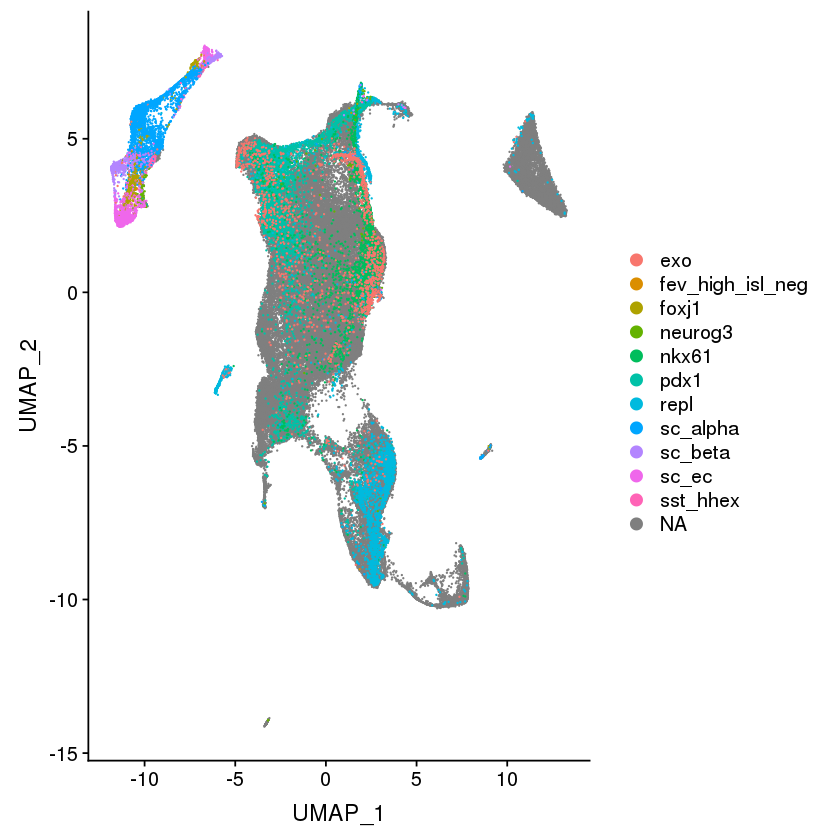

In [21]:
DimPlot(integrated, group.by = "Assigned_cluster", label = F)

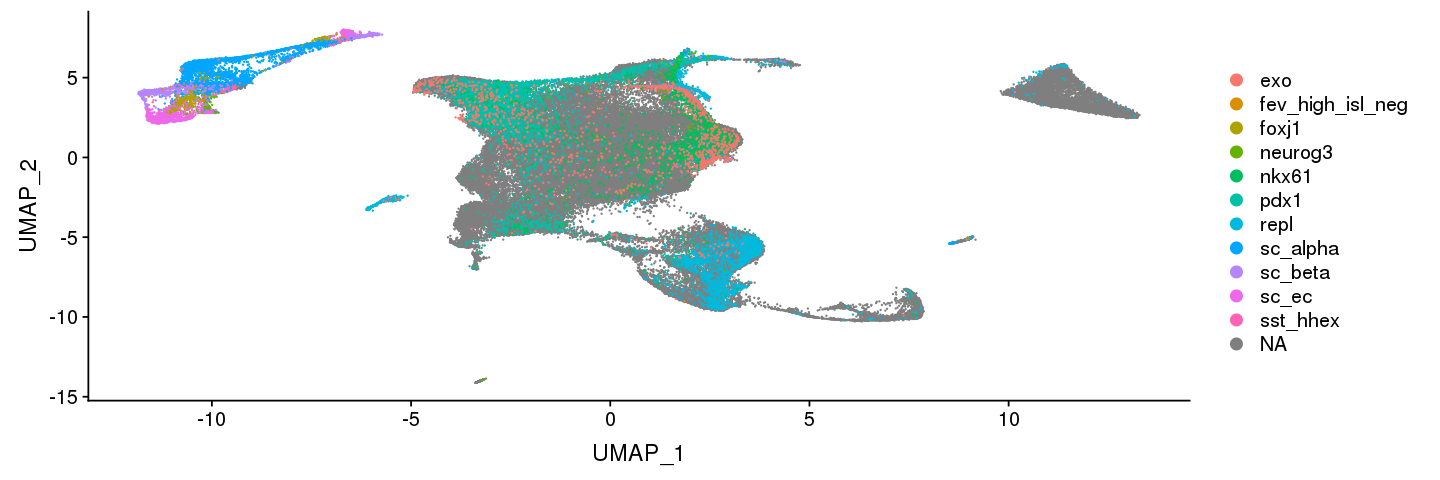

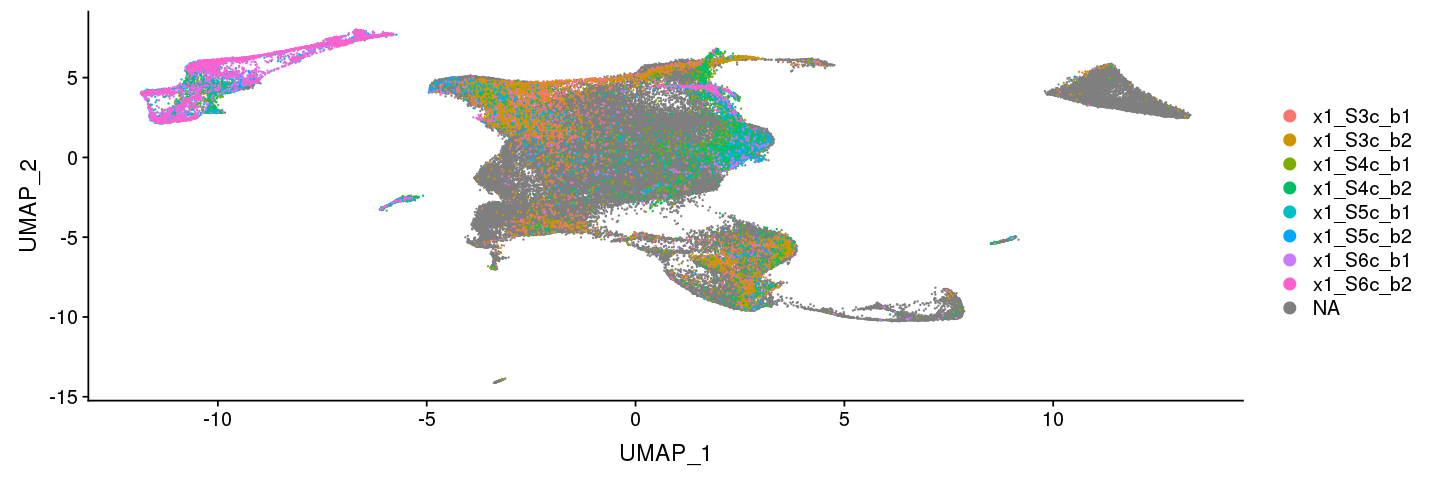

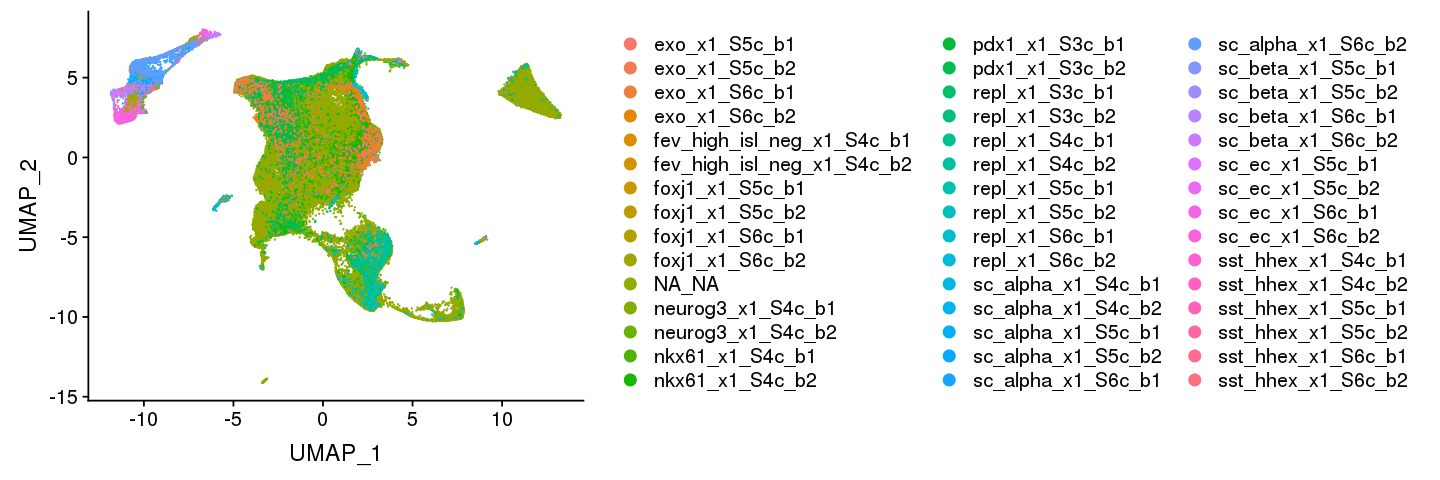

In [22]:
options(repr.plot.width = 12, repr.plot.height = 4)


integrated@meta.data$melton_celltype <- NA
integrated@meta.data$melton_celltype <- paste(integrated@meta.data$Assigned_cluster, integrated@meta.data$Lib_prep_batch, sep = "_")

DimPlot(integrated, group.by = "Assigned_cluster", label = F)
DimPlot(integrated, group.by = "Lib_prep_batch", label = F)
DimPlot(integrated, group.by = "melton_celltype", label = F)



In [26]:
res.used <- .5
integrated <- FindNeighbors(integrated, dims = 1:25)
integrated <- FindClusters( integrated, resolution = res.used)

Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 112509
Number of edges: 3695647

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9135
Number of communities: 21
Elapsed time: 55 seconds


1 singletons identified. 20 final clusters.


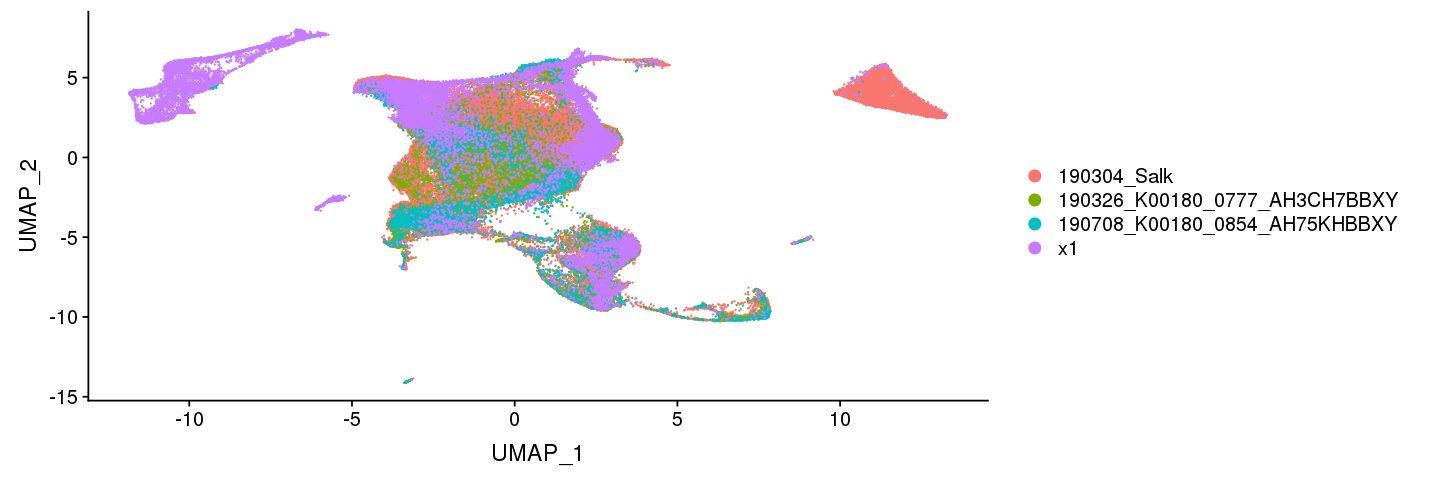

In [30]:
DimPlot(integrated, group.by = "orig.ident")

Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”

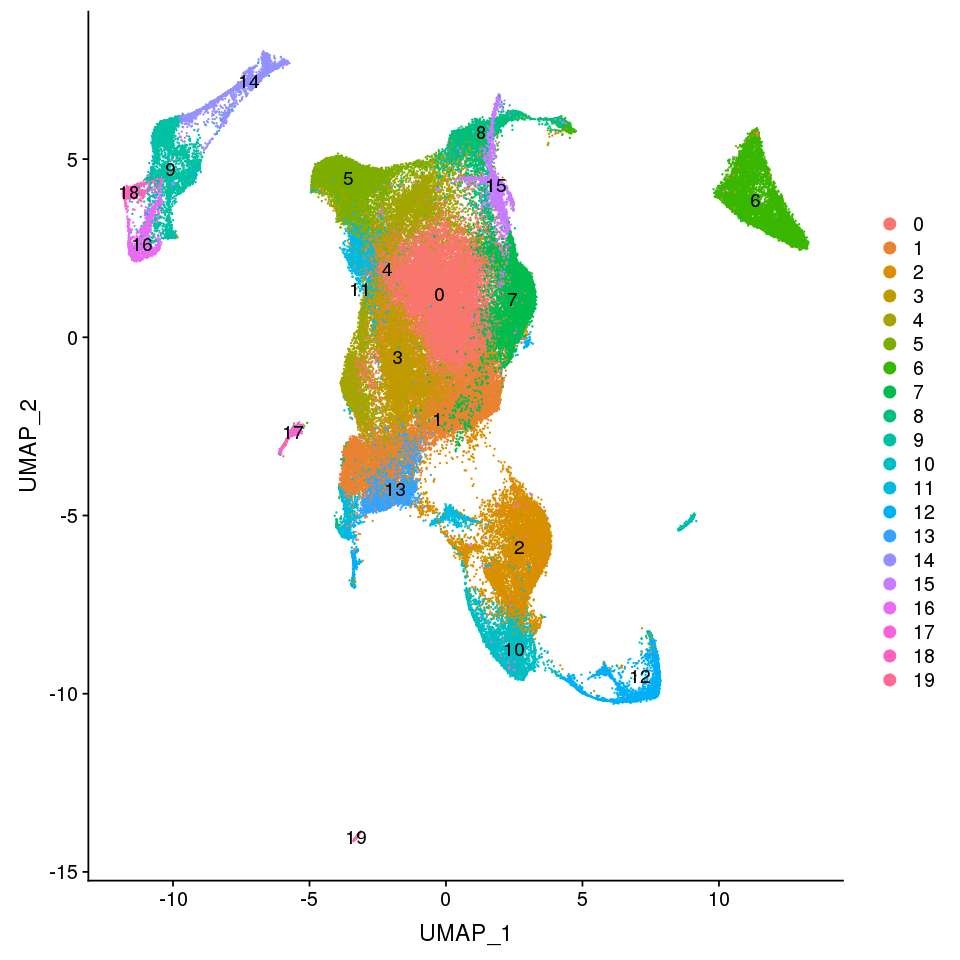

In [31]:
options(repr.plot.width = 8, repr.plot.height = 8)
DimPlot(integrated, label = T)

In [32]:
integrated <- FindClusters( integrated, resolution = 0.001)
integrated <- FindClusters( integrated, resolution = 0.01)
integrated <- FindClusters( integrated, resolution = 0.05)
integrated <- FindClusters( integrated, resolution = 0.075)
integrated <- FindClusters( integrated, resolution = 0.1)
integrated <- FindClusters( integrated, resolution = 1)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 112509
Number of edges: 3695647

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9990
Number of communities: 2
Elapsed time: 54 seconds


1 singletons identified. 1 final clusters.


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 112509
Number of edges: 3695647

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9925
Number of communities: 5
Elapsed time: 56 seconds


1 singletons identified. 4 final clusters.


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 112509
Number of edges: 3695647

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9732
Number of communities: 7
Elapsed time: 59 seconds


1 singletons identified. 6 final clusters.


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 112509
Number of edges: 3695647

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9655
Number of communities: 9
Elapsed time: 62 seconds


1 singletons identified. 8 final clusters.


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 112509
Number of edges: 3695647

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9602
Number of communities: 11
Elapsed time: 55 seconds


1 singletons identified. 10 final clusters.


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 112509
Number of edges: 3695647

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8881
Number of communities: 33
Elapsed time: 53 seconds


1 singletons identified. 32 final clusters.


In [34]:
library("clustree")

Loading required package: ggraph


In [41]:
# integrated@meta.data

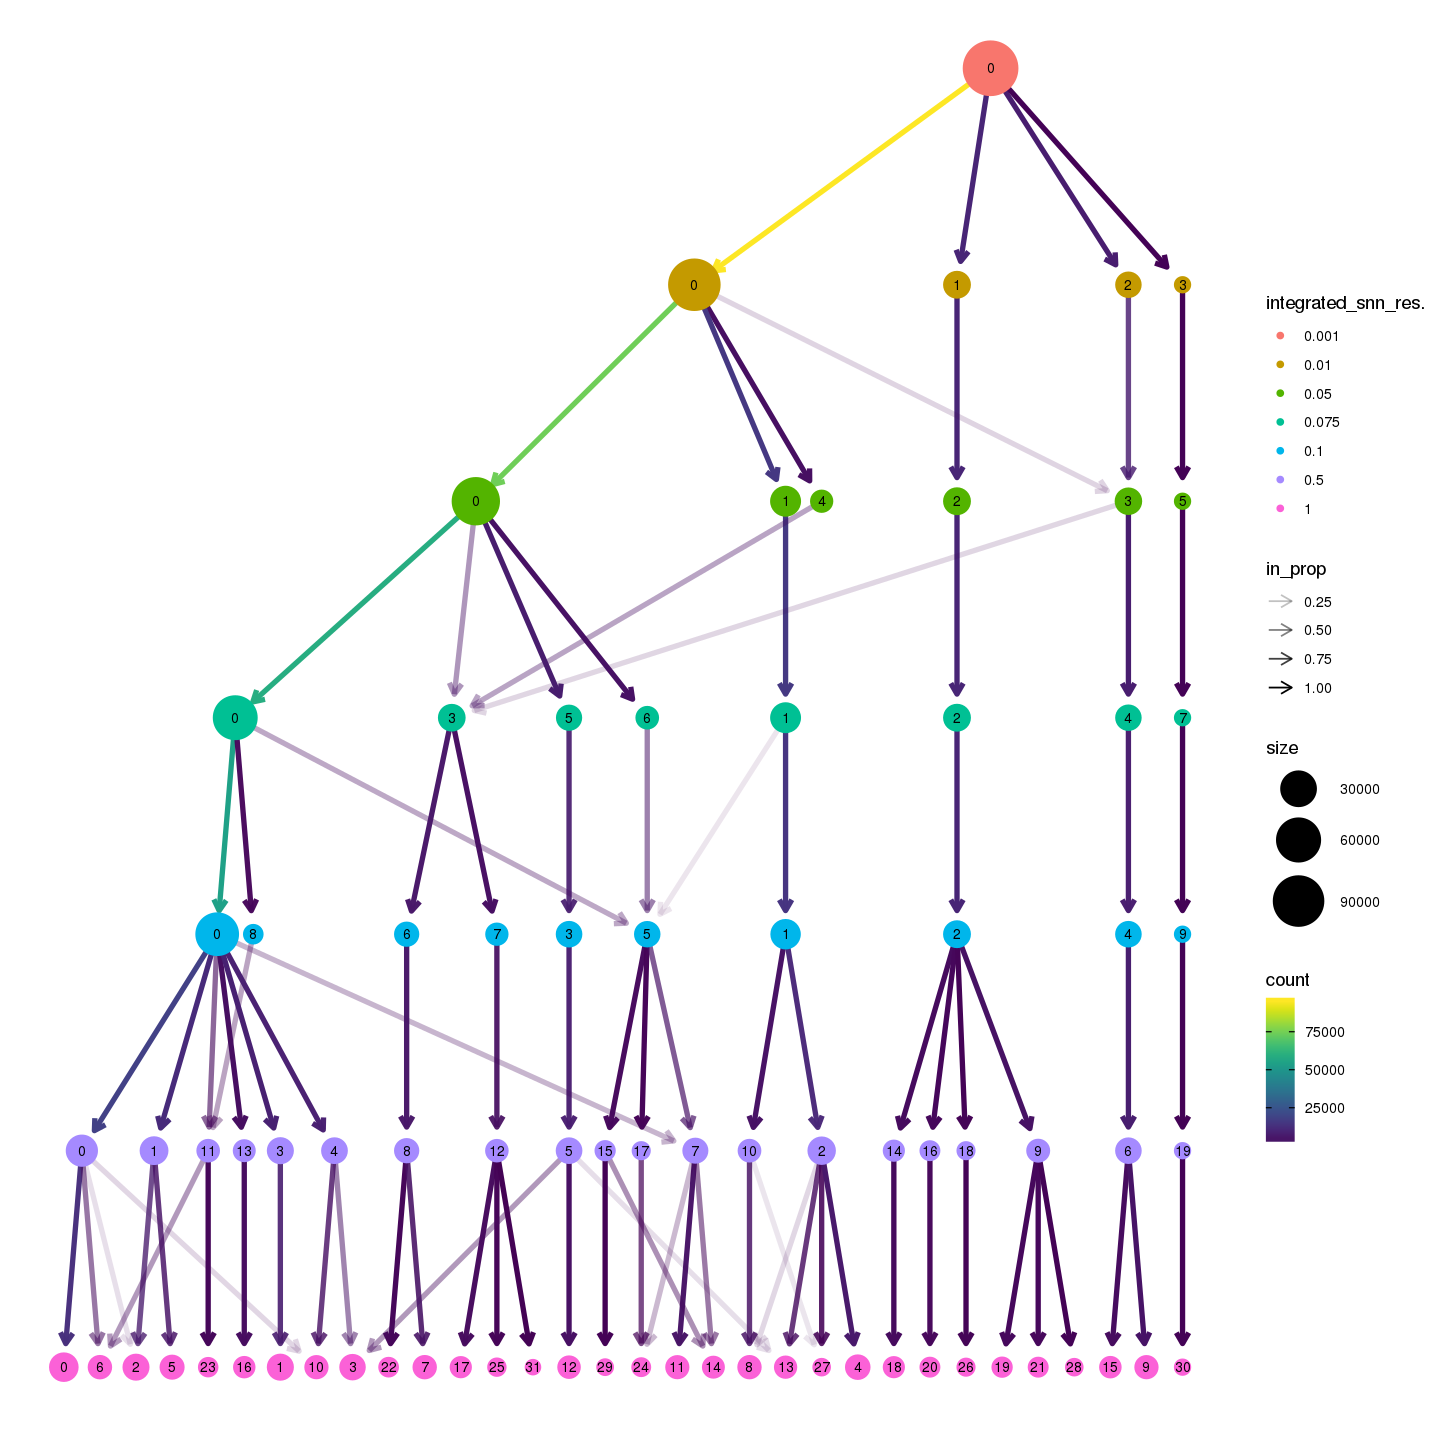

In [42]:
options(repr.plot.width = 12, repr.plot.height = 12)
clustree(integrated, prefix = "integrated_snn_res.")

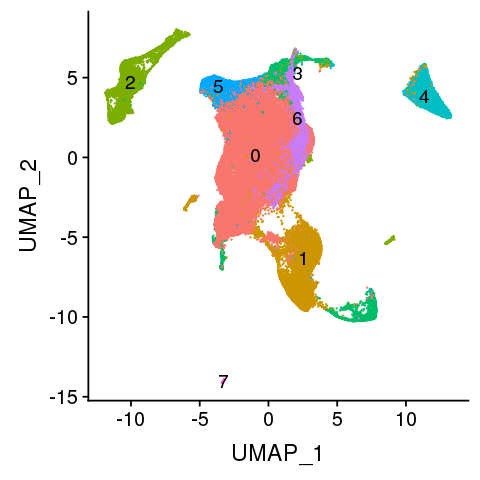

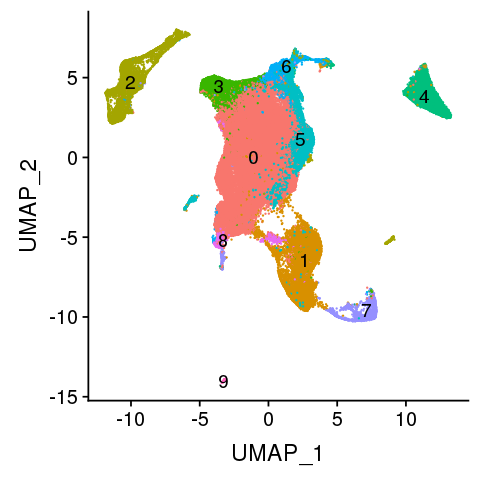

In [46]:
options(repr.plot.width = 4, repr.plot.height = 4)
DimPlot(integrated, group.by = "integrated_snn_res.0.075", label = T) + NoLegend()
DimPlot(integrated, group.by = "integrated_snn_res.0.1", label = T) + NoLegend()

In [49]:
DefaultAssay(integrated) <- "RNA"

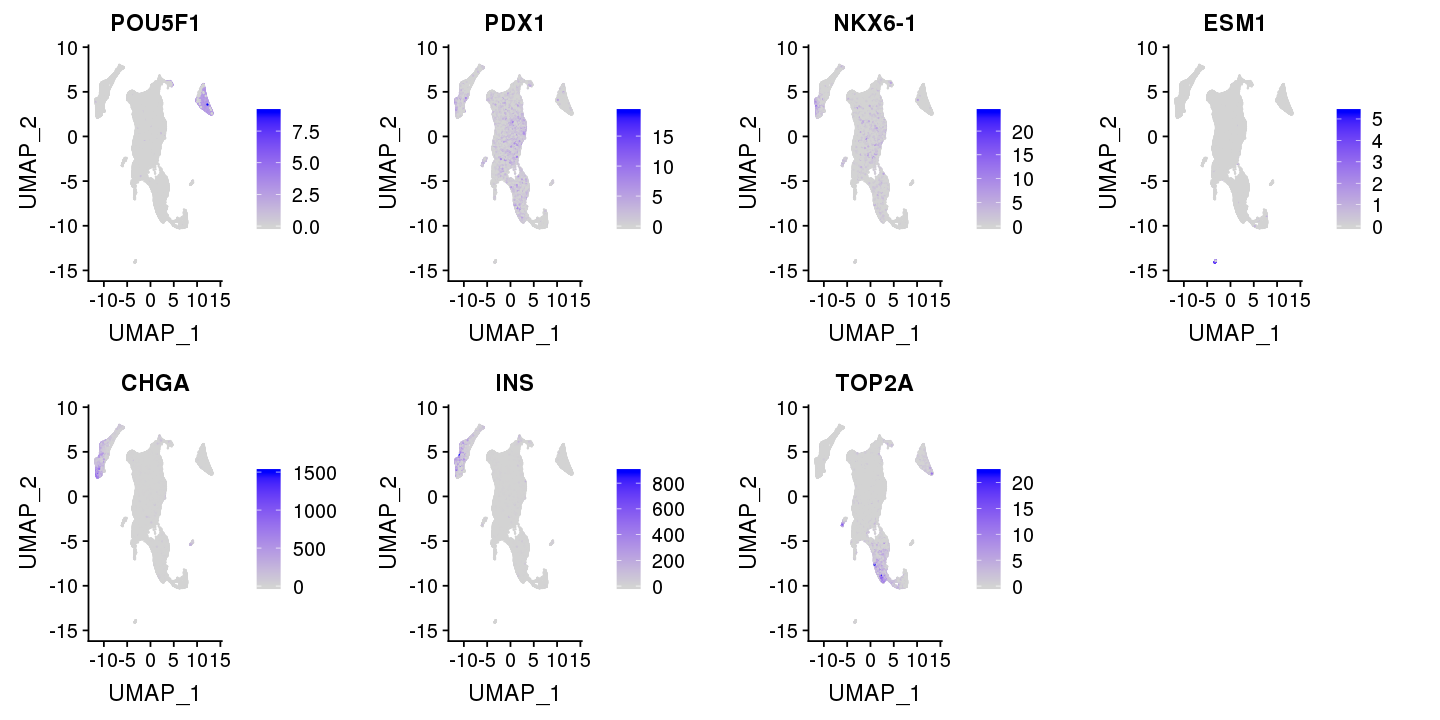

In [51]:
options(repr.plot.width = 12, repr.plot.height = 6)
FeaturePlot(integrated,
            c("POU5F1", "PDX1", "NKX6-1", "ESM1", "CHGA", "INS", "TOP2A"),
#             max.cutoff = 1, 
            ncol = 4)

In [52]:
save(integrated, file = paste(out, "obj.integrated.frazer.melton", sep = ""))